In [1]:
from __future__ import print_function

import lasagne
import numpy as np
import pandas as pd
import _pickle as pickle

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

Today, I want to implement the other metric to extract feature importance: connection weight mentioned in:

> Ibrahim, OM. 2013. [A comparison of methods  for  assessing the  relative  importance of input variables in  artificial neural networks](http://www.palisade.com/downloads/pdf/academic/DTSpaper110915.pdf). Journal of Applied Sciences Research, 9(11): 5692-5700.

In [3]:
# Load network params
npz_file =  "/Users/csiu/repo/predictTissue/src/model-mlp_n100-e100.txt.npz"
with np.load(npz_file) as f:
    param_values = [f['arr_%d' % i] for i in range(len(f.files))]
    
# save to variable
w_l1 = pd.DataFrame(param_values[0])
w_l2 = pd.DataFrame(param_values[2])

### Connection weights

$RI_x = \sum_{y=1}^m{w_{xy}w_{yz}}$

Essentially the sum of products from the input to the output

### Connection weights algorithm (CW)

In [4]:
def connection_weights(A, B):
    """
    Computes Connection weights algorithm
    A = matrix of weights of input-hidden layer (rows=input & cols=hidden)
    B = matrix of weights of hidden-output layer (rows=hidden & cols=output)
    """    
    cw = np.dot(A, B)
    
    # normalize to 100% for relative importance
    ri = cw / cw.sum()
    return(ri)

### Using CW

In [5]:
df = connection_weights(w_l1, w_l2)
df = pd.DataFrame(df)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.001145,-0.003803,0.002708,-0.002147,-0.002137,0.004420,0.002104,-0.006027,-0.000703,0.006333
1,0.001711,-0.001563,-0.002828,0.001717,-0.003227,0.002971,0.001551,-0.000200,-0.001483,0.001240
2,-0.000183,-0.000109,-0.000268,-0.003378,-0.002188,-0.003349,-0.002434,-0.001065,-0.001145,-0.002736
3,0.003478,-0.001750,0.001222,-0.001225,-0.000346,-0.007514,0.003400,-0.001867,0.003755,0.001890
4,0.001365,-0.001037,-0.001189,0.007029,0.000289,-0.001856,-0.000402,0.000009,-0.001003,-0.000863


/Users/csiu/software/anaconda/anaconda2-4.0.0/envs/kaggle/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


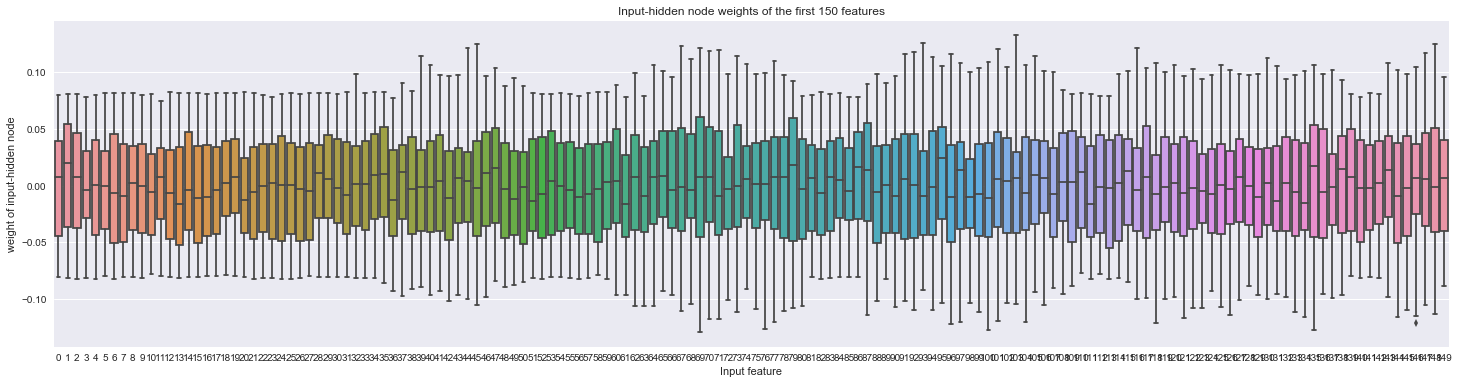

In [6]:
n = 150

f, ax = plt.subplots(figsize=(25, 6))
sns.boxplot(w_l1[:n].transpose())
plt.xlabel("Input feature")
plt.ylabel("weight of input-hidden node")
plt.title("Input-hidden node weights of the first {} features".format(n))

Again, weight of some regions are more variable than others

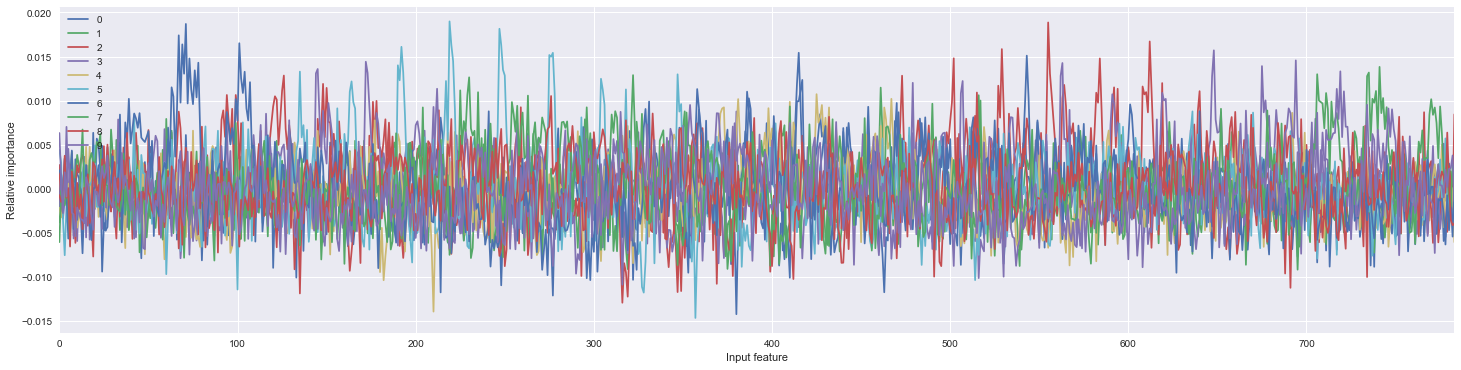

In [7]:
f, ax = plt.subplots(figsize=(25, 6))
df.plot(kind="line", ax=ax)
plt.xlabel("Input feature")
plt.ylabel("Relative importance")

- Unlike Garson's algorithm, get different feature importance depending on the class

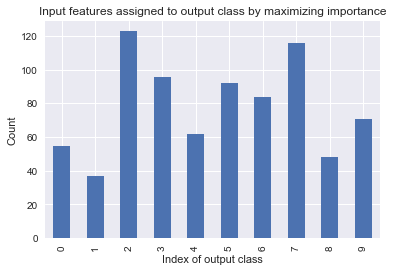

In [8]:
# Partitioning features to classes by max weight
df.idxmax(axis=1).value_counts(sort=False).plot(kind="bar")
plt.xlabel("Index of output class")
plt.ylabel("Count")
plt.title("Input features assigned to output class by maximizing importance")